In [1]:
import torch
import tensorflow
from tensorflow import keras
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
import torchvision.transforms as T
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [2]:
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D

In [4]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage

In [5]:
import pandas as pd
from PIL import Image
import numpy as np

In [6]:
a = pd.read_csv('10. MOTHS IMAGE DATASET-CLASSIFICATION\MOTHS.csv')

In [7]:
transforms = T.Compose([
    T.ToPILImage(),
    T.Resize(size = (112,112)),
    T.PILToTensor()
])

transforms_same = T.Compose([
    T.PILToTensor()
])


transforms_gray = T.Compose([
    T.Grayscale(num_output_channels=1),
    T.PILToTensor()
])

In [9]:
ctr = 0
X_train = []
Y_train = []
X_test = []
Y_test = []

for i in a.values:
    im = Image.open('10. MOTHS IMAGE DATASET-CLASSIFICATION\\'+i[1])
    temp_gray = transforms_gray(im)
    pix = np.float64(np.array(temp_gray))
    input_shape = pix.shape
    new_shape = input_shape[1], input_shape[0]
    result = skimage.filters.prewitt(pix)
    ans = np.float64(np.array(transforms_same(im)))
    for j in range(3):
        ans[j]=np.sqrt(ans[j]*ans[j]+result[0]*result[0])
    ans = transforms(torch.tensor(ans))
    # X_train.append(ans)
    
    #ans = transforms(im)
    if i[3]=='train':
        X_train.append(ans)
        Y_train.append(i[0])
    elif i[3]=='test':
        X_test.append(ans)
        Y_test.append(i[0])
    ctr+=1
    if ctr%100==0:
        print(ctr)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600


In [13]:
np.array([[1,2,3],[1,2,3],[1,2,3]])*(1/np.array([[1,2,3],[1,2,3],[1,2,3]]))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
np.transpose(X_train[0]).shape

torch.Size([224, 224, 3])

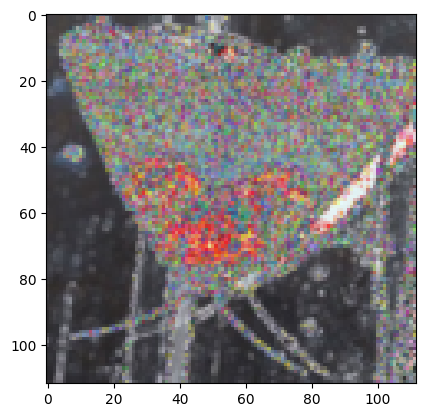

In [10]:
plt.imshow(np.transpose(np.int_(X_train[0])))

In [15]:
X_train[0]

array([[[188.        , 188.43033148, 190.03637545, ..., 220.48541936,
         216.21038848, 209.32538328],
        [188.27216553, 188.57735027, 189.29099445, ..., 218.41139271,
         216.78036106, 213.86864496],
        [188.86066297, 188.03637545, 190.21716124, ..., 219.50308325,
         219.86097626, 218.98762881],
        ...,
        [192.25286518, 193.44265186, 191.96261353, ...,  38.93430695,
          50.28804214,  51.4838724 ],
        [185.05973909, 187.81125224, 193.34187193, ...,  26.05158574,
          36.85314097,  35.77959903],
        [183.79349205, 183.13286048, 189.31740596, ...,  29.70116573,
          24.72132593,  29.5819889 ]],

       [[192.        , 192.43033148, 194.03637545, ..., 222.48541936,
         218.21038848, 211.32538328],
        [192.27216553, 192.57735027, 193.29099445, ..., 220.41139271,
         218.78036106, 215.86864496],
        [193.86066297, 193.03637545, 192.21716124, ..., 221.50308325,
         221.86097626, 220.98762881],
        ...,


In [28]:
pix = np.array(torch.transpose(X_train[0],0,2))

In [23]:
s.shape

(112, 112, 1)

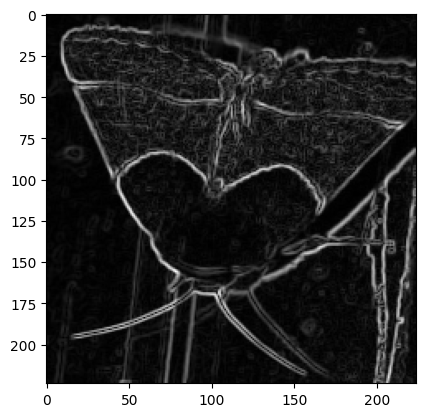

In [30]:
input_shape = pix.shape
new_shape = input_shape[1], input_shape[0]
result = skimage.filters.prewitt(pix)

# первоначальное изображение
plt.imshow(result, cmap=plt.cm.gray, aspect='equal')

In [11]:
train_dataset = torch.utils.data.TensorDataset(torch.Tensor(torch.stack(X_train, dim = 0)).float(), torch.Tensor(Y_train).float())
test_dataset = torch.utils.data.TensorDataset(torch.Tensor(torch.stack(X_test, dim = 0)).float(), torch.Tensor(Y_test).float())

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=False)

In [12]:
def split_to_x_y(dataset):
    x_ = []
    y_ = []
 
    for i in range (len(dataset)):
        x_.append(torch.transpose(dataset[i][:][0],0,2))
        y_.append(dataset[i][:][1])
      

    return x_, y_  

In [13]:
x_train, y_train = split_to_x_y(train_dataset)
x_test, y_test =  split_to_x_y(test_dataset)

In [14]:
Xtrain = np.array(x_train)
Ytrain = np.array(y_train)

Xtest = np.array(x_test)
Ytest = np.array(y_test)

Ytrain = keras.utils.to_categorical(Ytrain, 50) #10 классов 
Ytest = keras.utils.to_categorical(Ytest, 50)

In [27]:
Xtrain = np.array(X_train)
Ytrain = np.array(Y_train)

Xtest = np.array(X_test)
Ytest = np.array(Y_test)

Ytrain = keras.utils.to_categorical(Ytrain, 50) #10 классов 
Ytest = keras.utils.to_categorical(Ytest, 50)

In [15]:
input_shape = Xtrain.shape[1:]
input_shape

(112, 112, 3)

In [18]:
# архитектура игрушечной ResNet
inputs = keras.Input(shape=(112, 112, 3), name="img")

x = keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = keras.layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = keras.layers.MaxPooling2D(3)(x)

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = keras.layers.add([x, block_1_output])

x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = keras.layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = keras.layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x =keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(50, activation='softmax')(x)
model = keras.Model(inputs, outputs, name="toy_resnet")

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Xtrain, Ytrain, batch_size=64, epochs=1)
print(model.evaluate(Xtest, Ytest))

8/8 [==============================] - 1s 57ms/step - loss: 1.6261 - accuracy: 0.5720
[1.6260762214660645, 0.5720000267028809]


In [32]:
#Identity block

def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [33]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [78]:
def ResNet50(input_shape= input_shape):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = keras.Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [79]:
base_model = ResNet50()

In [80]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(50,activation='sigmoid', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [81]:
model = keras.Model(inputs=base_model.input, outputs=headModel)

In [82]:
from keras.optimizers import SGD, Adam

opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [83]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('/saved_models/best_model.h5', monitor='val_accuracy', 
                    save_best_only=True,
                    save_weights_only=False,
                    mode="auto",
                    save_freq="epoch",
                    initial_value_threshold=None,
)

In [85]:
H = model.fit(Xtrain, Ytrain, 
              batch_size = 64, 
              epochs = 10, 
              validation_data =(Xtest, Ytest), 
              shuffle = True, 
              callbacks = [mc,es]) 
# Score trained model. 
scores = model.evaluate(Xtest, Ytest, verbose = 1) 
print('Test loss:', scores[0]) 
print('Test accuracy:', scores[1])


Epoch 1/10
113/113 [==============================] - 136s 1s/step - loss: 1.5904 - accuracy: 0.5109 - val_loss: 4.5071 - val_accuracy: 0.1720
Epoch 2/10
113/113 [==============================] - 133s 1s/step - loss: 1.3972 - accuracy: 0.5715 - val_loss: 3.9882 - val_accuracy: 0.3080
Epoch 3/10
113/113 [==============================] - 139s 1s/step - loss: 1.1826 - accuracy: 0.6379 - val_loss: 1.9017 - val_accuracy: 0.4600
Epoch 4/10
113/113 [==============================] - 145s 1s/step - loss: 0.9922 - accuracy: 0.6883 - val_loss: 1.6883 - val_accuracy: 0.5320
Epoch 5/10
113/113 [==============================] - 138s 1s/step - loss: 0.8699 - accuracy: 0.7182 - val_loss: 1.3889 - val_accuracy: 0.6120
Epoch 6/10
113/113 [==============================] - 138s 1s/step - loss: 0.7247 - accuracy: 0.7679 - val_loss: 1.1262 - val_accuracy: 0.6520
Epoch 7/10
113/113 [==============================] - 130s 1s/step - loss: 0.5483 - accuracy: 0.8242 - val_loss: 2.0399 - val_accuracy: 0.4760